<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/main/neralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [935]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy 



In [936]:
"""
input_num :インプット層のニューロン数
hidden_num ：隠れ層のニューロン数
output_num ：出力層のニューロン数
"""
N = 4#データ数(ミニバッチ)
input_num = 2 
hidden_num = 12
output_num = 1

In [937]:
"""
重み、バイアス、初期設定
W1：隠れ層の重み
B1:隠れ層のバイアス
W2:出力層の重み
B2:隠れ層のバイアス
"""


W1 = np.random.rand(input_num,hidden_num)
B1 = np.random.rand(hidden_num)
W2 = np.random.rand(hidden_num,output_num)
B2 = np.random.rand(output_num)

In [938]:
i = 0


epoch = 0
epoch_num= 200
loss = np.zeros(epoch_num)
N = 4#データ数(ミニバッチ)
learning_rate = 0.2#学習率
beta1 = 0.9
beta2 = 0.999
epsiron = 0.00000001
alpha = 0.0001
mX = np.zeros((hidden_num,1))
vX = np.zeros((hidden_num,1))
hid_delta_accum = np.zeros((hidden_num,1))
m = 0
v = 0

In [939]:
#シグモイド関数（出力層）

def sigmoid(x):
  return 1/(1+np.exp(-x))
"""
def sigmoid(x):
  if x < -5:
    return 0

  if -5<=x<=5:
    return 1/10*x+0.5

  if 5 < x:
    return 1
 """
#ReLU関数（隠れ層）
def relu(x):
  return np.maximum(0,x)

In [940]:
#交差エントロピー誤差

def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  
  batch_size = y.shape[0]#yの行数
  return np.sum(-t*np.log(y)-(1-t)*np.log(1-y))/batch_size


  
  

In [941]:
#活性化関数の微分(relu)u:隠れ層の活性

def relu_diff(u):
  d = np.zeros_like(u) #xと同じ形状の配列を作成
  for i in range(len(u)):
    for j in range(len(u[0])):
      if u[i][j]>0:
        d[i][j] = 1
      else: 
        d[i][j] = 0

  return d


In [942]:
#隠れ層の誤差
"""
delta:一個前の誤差（出力層の誤差）
w:一個前の重み（出力層の重み）
activ:活性化関数の微分
"""
def hidden_delta(delta,w,activ):
  d = np.zeros((N,hidden_num)) #データ数×隠れ層のニューロン数の配列を作成
  for i in range(len(delta)):
    #print("i = ", i)
    for j in range(hidden_num):
      #print("j =", j)
      d[i][j] = delta[i]*w[j]*activ[i][j]
      #if i == 0 and j == 1:
        #print(d[i][j])
        #print(delta[i])
        #print(w[i])
        #print(activ[i][j])

  return np.array(d)
  


In [943]:


for i in range(epoch_num):
  
  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力
  target =  np.array([[0],[1],[1],[0]]) #教師
  

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  #print(Z1)
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  loss[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  


  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  Z1_t = np.transpose(Z1)
  deltaX_accum = np.dot(Z1_t,delta)
  #print(Z1_t)
  beta1coef = (1-beta1)/N
  beta2coef = (1-beta2)/N/N
 
  
  
  """ 
  #adam
  for q in range(output_num):#下説明あり
    mX[q] = beta1*mX[q] + beta1coef*(deltaX_accum[q] + alpha*W2[q]*N)
    vX[q] = beta2*vX[q] + beta2coef*(deltaX_accum[q] + alpha*W2[q])*(deltaX_accum[q]+alpha+W2[q])
    m = beta1*m+beta1coef*delta
    v = beta2*v+beta2coef*delta*delta
  
  
  sqbeta = np.sqrt((1-beta2**(epoch+1)))
  learning_rate2 = learning_rate/(1-beta1**(epoch+1))*sqbeta#学習率の更新
  epsilon2 = sqbeta * epsiron

  q = 0
  for p in range(hidden_num-1):
    W2[q] = W2[q] - learning_rate2*mX[q]/(np.sqrt(vX[q]))+epsilon2
  B2 = B2 - learning_rate2*m/(np.sqrt(v)+epsilon2)
  
  """
  delta_accum = np.sum(delta) 
  learning_ratecoef = learning_rate/N
  """
  for q in range(hidden_num):
    W2[q] = (1-alpha*learning_rate)*W2[q]-learning_ratecoef*deltaX_accm[q]
  B2 = B2 -learning_ratecoef*delta_accum
  """
  
  W2 = (1-alpha*learning_rate)*W2-learning_ratecoef*deltaX_accum
  B2 = B2 -learning_ratecoef*delta_accum

  

  #print(W2)
  ###隠れ層の逆伝搬
  
  differential_y = relu_diff(Z1)#活性化関数の微分
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  hid_delta_accum =np.transpose(np.sum(hid_delta,axis=0))
  #print(hid_delta_accum)
 
  #print(W1)
  #print(delta)
  #print(W2)
  #print(differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  hid_deltaX_accum = np.dot(x_t,hid_delta)
 
  #print(B2)
  for i in range(hidden_num):
    for j in range(input_num):
      W1[j][i] = (1-alpha*learning_rate)*W1[j][i]-learning_ratecoef*hid_deltaX_accum[j][i]
    B1[i] = B1[i] -learning_ratecoef*hid_delta_accum[i]
  
  """
  ##重み
  differential_y = relu_diff(Z1)#活性化関数の微分
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(delta)
  #print(W2)
  #print(differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  delta_hidden = np.dot(x_t,hid_delta)
  for i in range(hidden_num-1):
    for j in range(N-1):
      delta_accum2[i] = np.sum(hid_delta[j][i])
  print(delta_accum2)
  #delta_accum = 
  for q in range(hidden_num-1):
    W1[q] = (1-alpha*learning_rate)*W1[q]-learning_ratecoef*sum_delta[q]
  B1 = B1 -learning_ratecoef*delta_accum

  """
  epoch = epoch +1

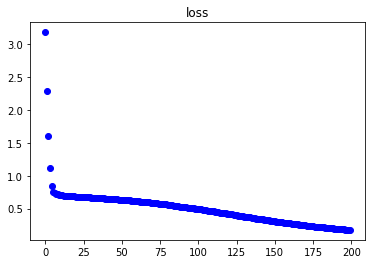

In [944]:
#グラフ表示
p = np.arange(epoch_num)
plt.scatter(p, loss, c='b', label='loss_data')
plt.title('loss')
plt.show()

In [945]:
A1 = np.dot(x,W1) +B1
Z1 = relu(A1)#一層目活性化関数かける


A2 = np.dot(Z1,W2)+B2
Z22 = sigmoid(A2)

delta = Z2 - target#誤差
print(Z22)
print(W1)
print(W2)
loss[99]

[[0.18594334]
 [0.90297152]
 [0.78882063]
 [0.13652056]]
[[ 0.92314153  0.58293521  0.71837632 -2.08145384  0.37878172 -0.15736947
   0.74797086 -0.18701578  0.01215323 -0.40471675  0.64214674  0.88896525]
 [ 0.08289401  0.47632861  0.00584456  2.07726147  1.17321924  0.78496382
   0.85880015  1.05254248  0.54590752  0.96583337 -0.05555563  0.11924949]]
[[ 0.86005742]
 [ 0.44895754]
 [ 0.73723011]
 [ 2.96072564]
 [-0.53429678]
 [-0.4303572 ]
 [-0.98025946]
 [-0.57354836]
 [-0.2249594 ]
 [-0.97644336]
 [ 0.6955536 ]
 [ 0.44708182]]


0.49749442463743054